In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [16]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='citric acid'>

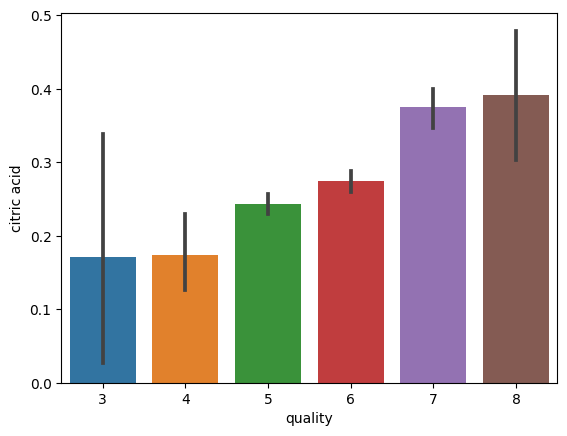

In [17]:
sns.barplot(x=df['quality'],y=df['citric acid'],data=df)

<Axes: xlabel='quality', ylabel='chlorides'>

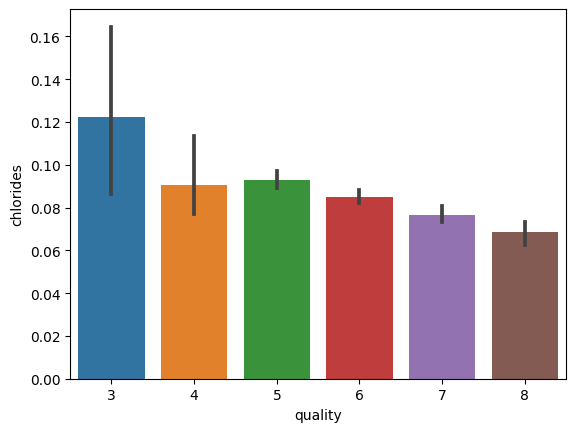

In [18]:
sns.barplot(x=df['quality'],y=df['chlorides'],data=df)

<Axes: xlabel='quality', ylabel='residual sugar'>

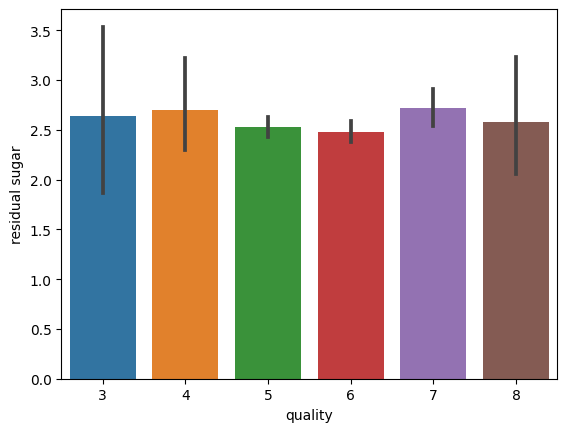

In [19]:
sns.barplot(x=df['quality'],y=df['residual sugar'],data=df)

<Axes: xlabel='citric acid', ylabel='fixed acidity'>

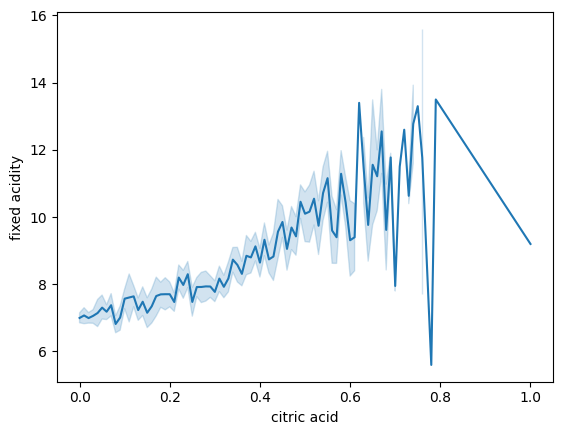

In [20]:
sns.lineplot(x=df['citric acid'],y=df['fixed acidity'],data=df)

In [22]:
def qualityupdate(df):
    for i, row in df.iterrows():
        val=row['quality']
        if val>5:
            df.at[i, 'quality']=1
        else:
            df.at[i, 'quality']=0
qualityupdate(df)

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [30]:
x=df.drop(['quality'],axis=1)
y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [32]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

[[165  73]
 [ 48 194]]
0.7479166666666667


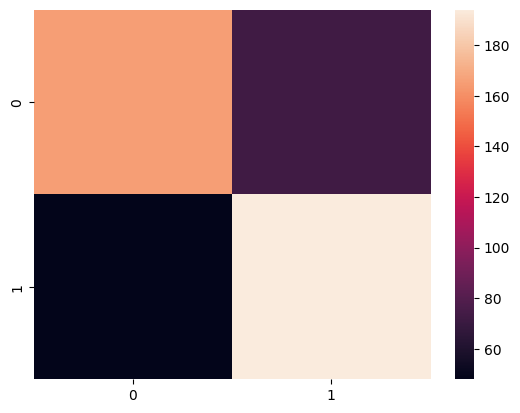

In [40]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm)
print(accuracy_score(y_pred,y_test))

In [41]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

[[165  53]
 [ 48 214]]
0.7895833333333333


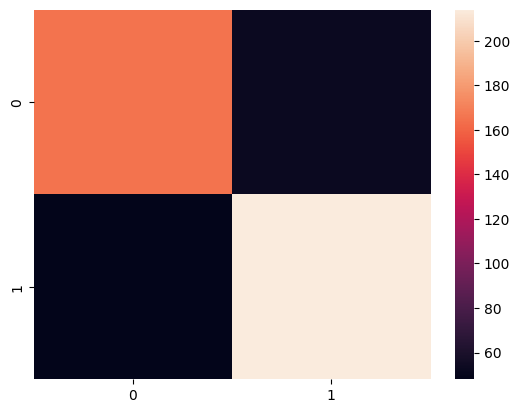

In [42]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm)
print(accuracy_score(y_pred,y_test))